In [1]:
pip install wbgapi

In [2]:
import wbgapi as wb
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import itertools as iter
from sklearn.datasets import make_blobs
from numpy import array, exp

In [3]:
#Load the economic indicators globally
data=pd.read_csv("world_indicator_data.csv", low_memory=False)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392


In [4]:
data.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,20206,20207,20208,20209,20210,20211,20212,20213,20214,20215
Country Name,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Country Code,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,ABW,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $2.15 a day (2017 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)","Primary completion rate, total (% of relevant ...",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
Indicator Code,SP.URB.TOTL.IN.ZS,SP.URB.TOTL,SP.URB.GROW,SP.POP.TOTL,SP.POP.GROW,SI.POV.DDAY,SH.STA.MALN.ZS,SH.MED.CMHW.P3,SH.DYN.MORT,SE.PRM.CMPT.ZS,...,AG.LND.FRST.ZS,AG.LND.FRST.K2,AG.LND.EL5M.ZS,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.RU.K2,AG.LND.ARBL.ZS,AG.LND.AGRI.ZS,AG.LND.AGRI.K2
1960,50.776,27728.0,NaN,54608.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#data.isnull().sum()

In [6]:
data = data.dropna()

In [7]:
#Indicators to be chosen for analysis
econm = ['NE.IMP.GNFS.ZS','NY.GDP.MKTP.CD']
cntry = ["JPN","AUS",'BMU','LUX','IND','BRA','ARG','ESP','GBR','CHL']
clim=['EG.CFT.ACCS.RU.ZS','EG.CFT.ACCS.UR.ZS']
data_econm  = wb.data.DataFrame(econm, cntry, mrv=7)
data_clim  = wb.data.DataFrame(clim, cntry, mrv=7)

In [8]:
# Indicators which are related to economy
data_econm.columns = [f.replace('YR','') for f in data_econm.columns]      
data_econm=data_econm.stack().unstack(level=1)                             
data_econm.index.names = ['Country_Nme', 'Year']                           
data_econm.columns                                                     
data_econm.fillna(0)
data_econm.head()

series            NE.IMP.GNFS.ZS  NY.GDP.MKTP.CD
Country_Nme Year                                
ARG         2016       13.566793    5.575323e+11
            2017       13.969318    6.436284e+11
            2018       16.325850    5.248199e+11
            2019       14.705737    4.477547e+11
            2020       13.598284    3.857405e+11

In [9]:
# Indicators which are related to climate
data_clim.columns = [f.replace('YR','') for f in data_clim.columns]      
data_clim=data_clim.stack().unstack(level=1)                             
data_clim.index.names = ['Country_Nme', 'Year']                           
data_clim.columns                                                     
data_clim.fillna(0)
data_clim.head()

series            EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS
Country_Nme Year                                      
ARG         2015               96.0               99.9
            2016               96.5               99.9
            2017               96.8               99.9
            2018               97.1               99.9
            2019               97.3               99.9

In [10]:
ec1=data_econm.reset_index()
ec2=ec1.fillna(0)
cl1=data_clim.reset_index()
cl2=cl1.fillna(0)

In [11]:
final_data = pd.merge(ec2, cl2)
final_data.head()

series,Country_Nme,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.CD,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,ARG,2016,13.566793,5.575323e+11,96.5,99.9
1,ARG,2017,13.969318,6.436284e+11,96.8,99.9
2,ARG,2018,16.325850,5.248199e+11,97.1,99.9
3,ARG,2019,14.705737,4.477547e+11,97.3,99.9
4,ARG,2020,13.598284,3.857405e+11,97.5,99.9


In [12]:
final_data1 = final_data.iloc[:,2:]
final_data.iloc[:,2:] = (final_data1-final_data1.min())/ (final_data1.max() - final_data1.min())
final_data.head()

series,Country_Nme,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.CD,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,ARG,2016,0.010505,0.097970,0.948830,0.993289
1,ARG,2017,0.012899,0.114999,0.953216,0.993289
2,ARG,2018,0.026916,0.091500,0.957602,0.993289
3,ARG,2019,0.017279,0.076257,0.960526,0.993289
4,ARG,2020,0.010692,0.063991,0.963450,0.993289


In [14]:
#K-means Clustering form
final_data2 = final_data.drop('Country_Nme', axis = 1)
kmns = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(final_data2)

C:\Users\sunit\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sunit\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sunit\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sunit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

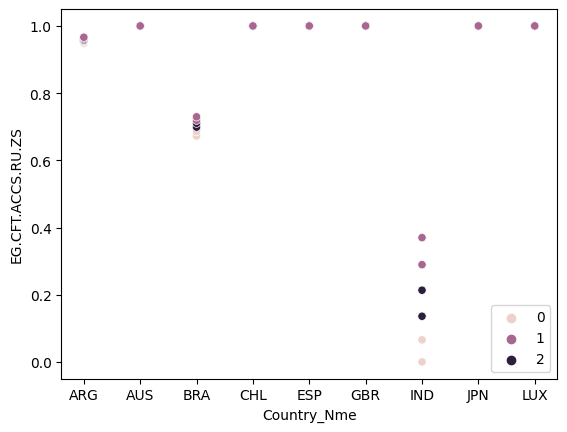

In [15]:
sns.scatterplot(data=final_data, x="Country_Nme", y="EG.CFT.ACCS.RU.ZS", hue=kmns.labels_)
plt.legend(loc='lower right')
plt.show()

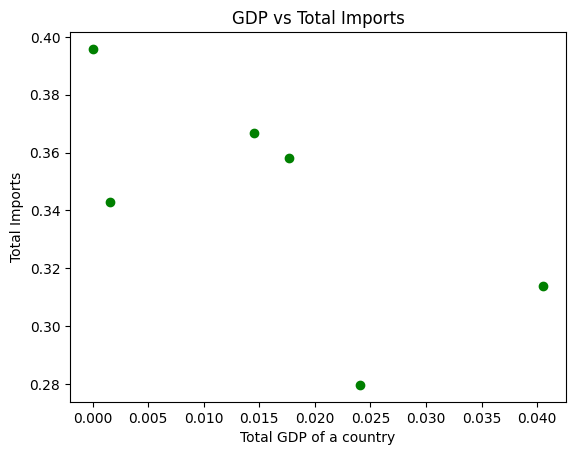

In [17]:

b=final_data[(final_data['Country_Nme']=='BRA')]
txt = b.values
x, y = txt[:, 2], txt[:, 3]
plt.scatter(x, y,color="green")
plt.title('GDP vs Total Imports')
plt.ylabel('Total Imports')
plt.xlabel('Total GDP of a country')
plt.show()

Function Covariance -> [[ 0.06243117 -0.11659771  0.05429975]
 [-0.11659771  0.21784649 -0.10149148]
 [ 0.05429975 -0.10149148  0.04730213]]
Function Parameters -> [ 0.05568173 -0.07772897  0.02582637]


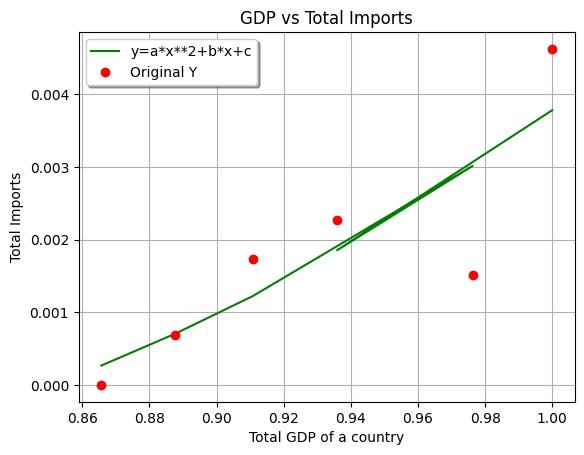

In [18]:
k=final_data[(final_data['Country_Nme']=='LUX')]
txt1 = k.values
x, y = txt1[:, 2], txt1[:, 3]

def functn(x, a, b, c):
    return a*x**2+b*x+c
param, covar = curve_fit(functn, x, y)
param, _ = curve_fit(functn, x, y)
print("Function Covariance ->", covar)
print("Function Parameters ->", param)

a, b, c = param[0], param[1], param[2]
y_fit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, y_fit, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Original Y",color="red")
    plt.ylabel('Total Imports')
    plt.title('GDP vs Total Imports')
    plt.xlabel('Total GDP of a country')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show() 

Function Covariance -> [[ 7.14406163e+03 -2.77651238e+02  1.27897073e+00]
 [-2.77651238e+02  1.20973209e+01 -7.11298728e-02]
 [ 1.27897073e+00 -7.11298728e-02  8.27672550e-04]]
Function Parameters -> [30.46905931 -3.01309318  0.37834746]


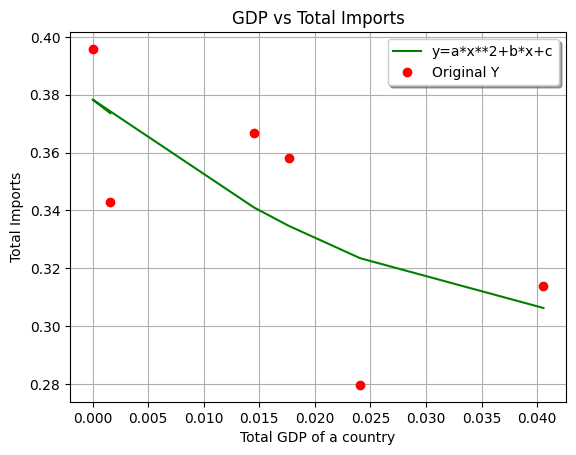

In [19]:
m=final_data[(final_data['Country_Nme']=='BRA')]
txt2 = m.values
x, y = txt2[:, 2], txt2[:, 3]

def functn(x, a, b, c):
    return a*x**2+b*x+c
param, covar = curve_fit(functn, x, y)
param, _ = curve_fit(functn, x, y)
print("Function Covariance ->", covar)
print("Function Parameters ->", param)

a, b, c = param[0], param[1], param[2]
y_fit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, y_fit, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Original Y",color="red")
    plt.ylabel('Total Imports')
    plt.title('GDP vs Total Imports')
    plt.xlabel('Total GDP of a country')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show() 

Function Covariance -> [[ 4.51240716e+04 -5.34431396e+03  1.53572865e+02]
 [-5.34431396e+03  6.37168289e+02 -1.84399804e+01]
 [ 1.53572865e+02 -1.84399804e+01  5.38114341e-01]]
Function Parameters -> [222.92344495 -23.72363703   1.12394448]


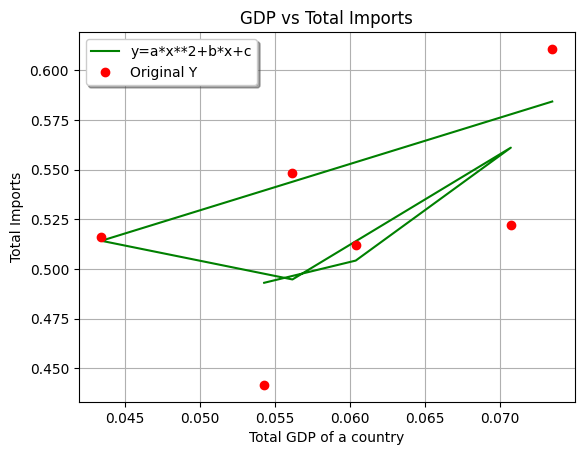

In [21]:
l=final_data[(final_data['Country_Nme']=='IND')]
txt3 = l.values
x, y = txt3[:, 2], txt3[:, 3]

def functn(x, a, b, c):
    return a*x**2+b*x+c
param, covar = curve_fit(functn, x, y)
param, _ = curve_fit(functn, x, y)
print("Function Covariance ->", covar)
print("Function Parameters ->", param)

a, b, c = param[0], param[1], param[2]
y_fit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, y_fit, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Original Y",color="red")
    plt.ylabel('Total Imports')
    plt.title('GDP vs Total Imports')
    plt.xlabel('Total GDP of a country')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show() 

#### The above line plots indicates that for the country with higher rural access to fuel and technology, the association between the total imports and total GDP is direct in nature. After that, for the country with medium rural access to fuel and technology, the association between the total imports and total GDP is indirect in nature. The association between the total imports and total GDP for the country with lower rural access to fuel and technology is indirect till a certain value of the GDP but it changes to a direct association after that

In [22]:
#Error range function definition
def err_ranges(x, func, param, sigma):
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 